In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [98]:
df = pd.read_csv('homeprice.csv')

In [99]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,685000
4,4000,725000


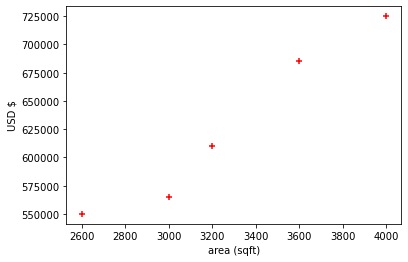

In [100]:
%matplotlib inline
plt.xlabel('area (sqft)')
plt.ylabel('USD $')
plt.scatter(df.area, df.price, color = 'red', marker='+')

In [101]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
reg.predict([[3300]])

array([629743.15068493])

In [103]:
#rules of linear regression is y = mx + b, m is coefficient, x is value something and b is intercept
m = reg.coef_
m

array([137.15753425])

In [104]:
b = reg.intercept_
b

177123.28767123283

In [105]:
x = 3300

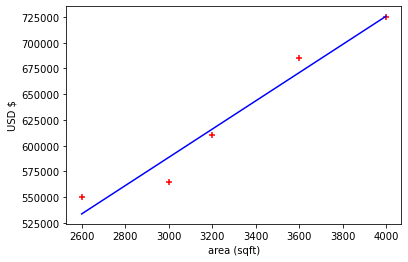

In [106]:
%matplotlib inline
plt.xlabel('area (sqft)')
plt.ylabel('USD $')
plt.scatter(df.area, df.price, color = 'red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [107]:
test_data = pd.read_csv('area.csv')
test_data

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [108]:
p = reg.predict(test_data)

In [109]:
test_data['price']= p

In [110]:
test_data.to_csv('prediction.csv', index= False)

Multiple Features

In [111]:
df2 = pd.read_csv('homeprice2.csv')
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [112]:
# check nan value it's need to fill with median value of bedrooms
import math
median_bedrooms = math.floor(df2.bedrooms.median())
median_bedrooms

4

In [113]:
# fill nan value
df2.bedrooms = df2.bedrooms.fillna(median_bedrooms)
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [114]:
reg = linear_model.LinearRegression()
reg.fit(df2[['area', 'bedrooms', 'age']], df2.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [116]:
reg.intercept_

221323.00186540443

In [117]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])

In [118]:
reg.predict([[2500, 3, 5]])

array([555487.15741139])